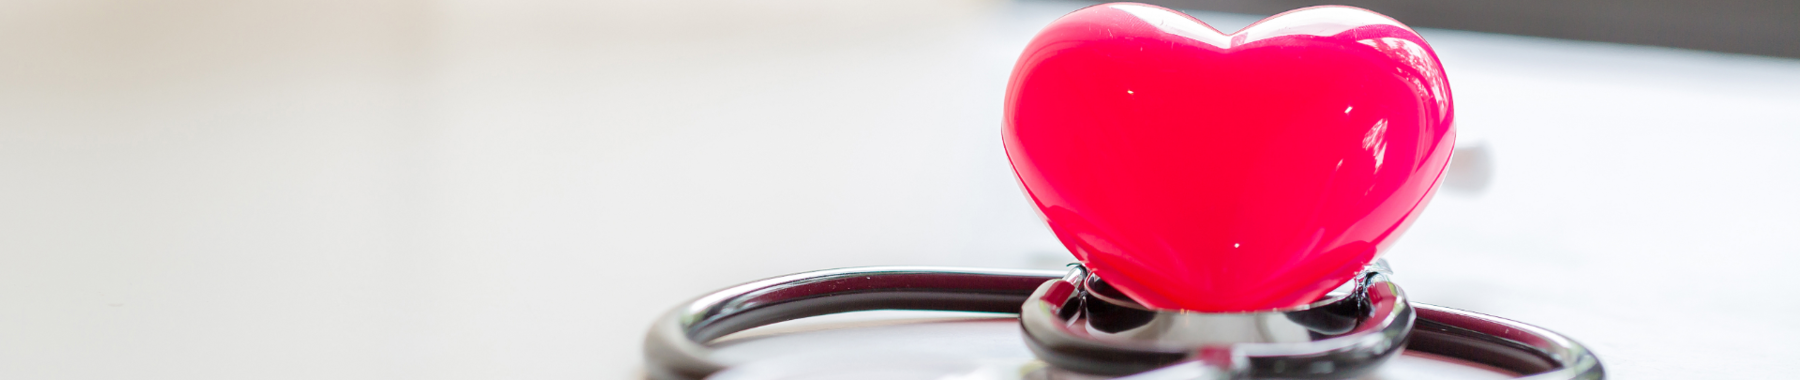


<h1 align="center"> Tarea Final - Joaquín Arhancet, Daniel Belderrain y Santiago Nalerio

### <font color='firebrick'><h1 align="center"><ins>Seguro de Vida</ins>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import sklearn
import warnings
import numpy as np
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Tabla de contenidos
 - [Data Exploration](#lower)
 - [Parte 2](#remove)
 - [Parte 3](#stemming)
 - [Parte 4](#stop)
 - [Parte 5](#a)
 - [Comentarios Finales](#b)

# <font color='firebrick'> Data Exploration:  <a id='lower'></a>
En esta etapa vamos a realizar algunas descripciones estaditisticas, analisis y visualizaciones para poder lograr una gran comprension de los datos a analizar.

In [3]:
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [4]:
df.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Con nuestro codigo "describe()" podemos ver principalmente medidas estadisticas de tendencia central como lo son la MEDIA, MINIMOS, MAXIMOS, CUARTILES y DESVIACION ESTANDAR.

Ahora mencionaremos algunas cosas que podemos ir visualizando e induciendo de la informacion que nos brinda el codigo "describe()":

1- La edad promedio de las personas de nuestro dataset es de 60 años lo cual es coherente con el trabajo y analisis que se nos solicito hacer ya que estamos hablando de seguros para personas las cuales tienen riesgos de tener problemas cardiacos (normalmente personas de edad avanzada). Vemos que no hay "jovenes" ya que la edad minima es de 51 años.

2- Con el describe hay mucha informacion que perdemos ya que muchas variables si bien son de tipo numerico, son binarias lo cual a veces en la informacion que brinda el "describe()" este tipo de atributos no se ven bien representados.

3- Dando por hecho algunas mediciones en columnas como "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine" y "serum_sodium", vamos a analizar y determinar si existen outliers dentro de estas mediciones especificas y tecnicas de salud y determianr si son outliers validos o no validos.

In [5]:
df.shape

(299, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Algunos comentarios y caracteristicas que se pueden ver a grandes rasgos en esta primera visualizacion:

1- Tenemos 13 columnas, por lo que nuestro DataFrame contiene 13 diferentes atributos los cuales describen cada registro "fila" que tenemos.

2- Hay 299 filas, por lo tanto tenemos 299 registros. En terminos de Big Data no estariamos hablando de un DataFrame con una GRAN cantidad de datos, pero eso no quiere decir que no sean utiles ya que a veces menos es mas, lo importante ya desde el primer momento es poder aprovechar cada dato y registro que tenemos ya que el numero de registros es reducido, tambien deberemos trabajar nuestro analisis y data cleaning de manera minuciosa para poder sacar el mayor jugo posible a los mismos.

3- Una gran ventaja que se puede a ver a simple vista es que todas nuestras variables son de tipo numerico lo cual nos facilita nuestro trabajo, analisis y predicciones.

4- Una desventaja y problema con el que ya podemos afirmar que nos encontraremos es la diferencia de rangos de valores que existen entre nuestras diferentes variables, esto vamos a tener que trabajarlo por medio de NORMALIZACION.

Antes de seguir analizando los datos que tenemos seria bueno poder constatar que no tengamos ningun problema de datos faltantes, outliers u otros inconvenientes que pueden existir, para esto vamos a utilizar diferentes codigos y luego vamos a comentar sobre los resultados.

In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Como podemos ver no existen valores nulos en nuestro Data Frame lo cual es bueno ya que de existir deberiamos tratarlos de la manera acorde a la situacion, en este caso no tenemos ningun datos faltante.

## Age

Edad de los pacientes a los que se les realizó el seguimiento médico.

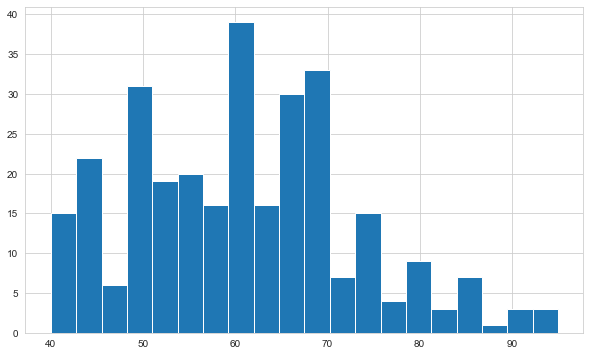

In [8]:
df['age'].hist(bins=20,figsize=(10,6))
display()

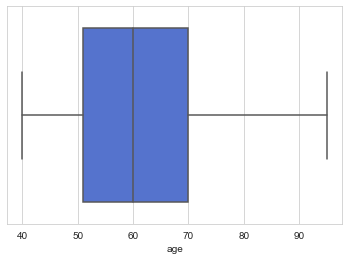

In [9]:
sns.boxplot(x = df['age'], color = 'royalblue')
display()

In [10]:
# La edad presenta una distribución normal con un leve sesgo positivo sin outliers ni valores atípicos.
# No identificamos data quality issues.

## Anaemia

Pacientes a los cuales e les detectó que sufren de anemia.

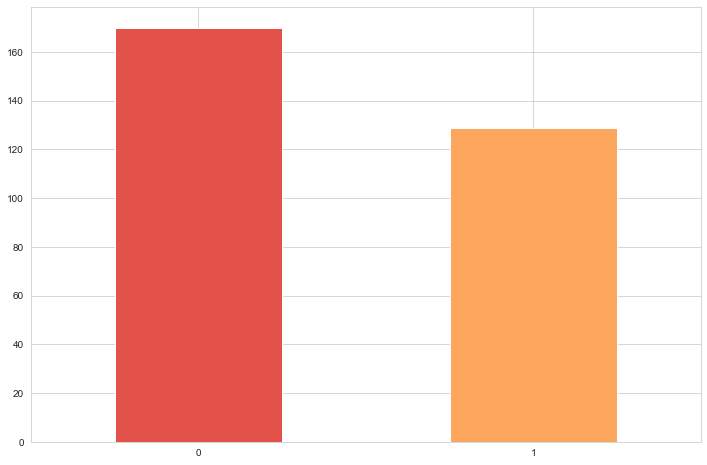

In [11]:
palette = sns.color_palette("Spectral")

df['anaemia'].value_counts().plot(kind='bar',figsize=(12,8),color = palette)
plt.xticks(rotation=0)
display()

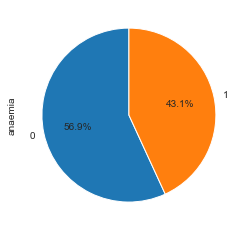

In [12]:
df['anaemia'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')
display()

In [13]:
# Tiene anemia=1
# No tiene anemia = 0
# La mayoría de los pacientes no tienen anemia, aunque la diferencia no es significativa.
# No identificamos data quality issues.

## Creatinine Phosphokinase    

La creatina quinasa es un tipo de proteína conocida como enzima. Se encuentra principalmente en los músculos esqueléticos y el corazón, y en cantidades menores en el cerebro. Los músculos esqueléticos son los que están unidos al esqueleto. Funcionan con los huesos para ayudarnos a movernos y le entregan poder y fuerza al cuerpo.

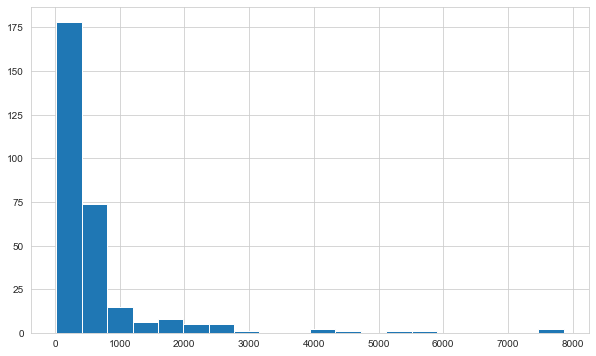

In [14]:
df['creatinine_phosphokinase'].hist(bins=20,figsize=(10,6))
display()

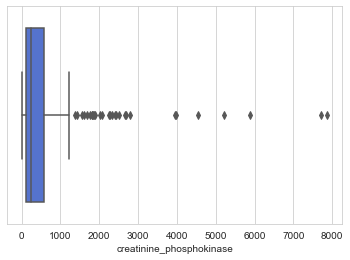

In [15]:
sns.boxplot(x = df['creatinine_phosphokinase'], color = 'royalblue')
display()

In [16]:
# El valor normal de CPK se encuentra dentro del rango de 10 a 120 microgramos por litro (mcg/L). 
# Como pudimos ver en el boxplot tenemos valores que son mucho mas altos de la medida normal para esta caracteristica. 
# Deberemos hacer un alaisis por medio de visualizaciones y basandonos en datos empiricos sobre el tema para determinar
# si estos outliers son validos o no.
# No identificamos data quality issues.

## Ejection Fraction           

Esta variable refiere al volumen de sangre bombeada por el ventriculo izquierdo en un latido, esto es llamado el "volumen sistólico". Normalmente se encuentra dentro de los 70 ml por latido.

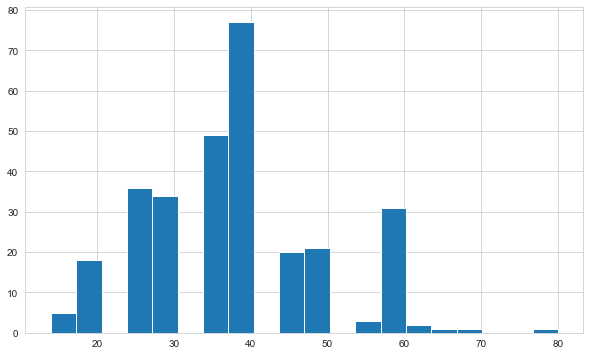

In [17]:
df['ejection_fraction'].hist(bins=20,figsize=(10,6))
display()

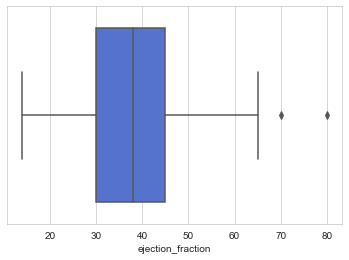

In [18]:
sns.boxplot(x = df['ejection_fraction'], color = 'royalblue')
display()

In [19]:
# En este caso encontramos valores que se encuentran muy por debajo de nuestro valor medio de 70 ml por latido, por 
# esta razón es una variable a analizar y tener en cuenta.
# No identificamos data quality issues.

## High Blood Pressure

Esta variable refiere a si el paciente luego de realizado el estudio, fue detectado con presión alta.

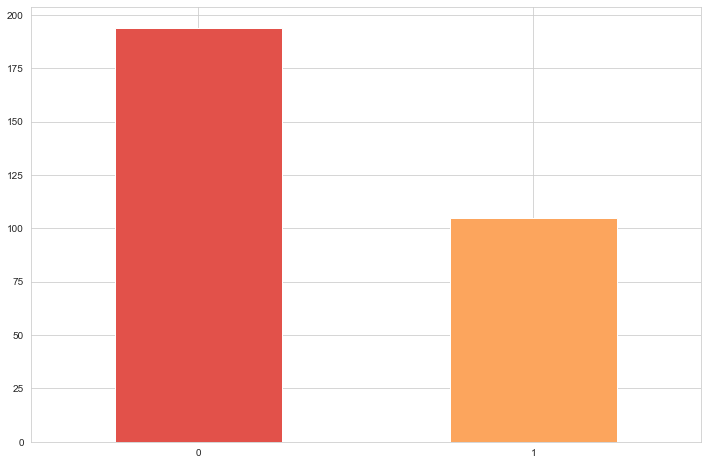

In [20]:
palette = sns.color_palette("Spectral")

df['high_blood_pressure'].value_counts().plot(kind='bar',figsize=(12,8),color = palette)
plt.xticks(rotation=0)
display()

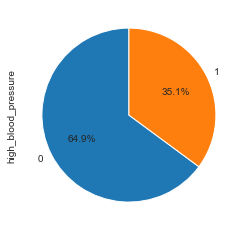

In [21]:
df['high_blood_pressure'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')
display()

In [22]:
# Tiene presión alta = 1
# No tiene presión alta = 0
# La mayoría de los pacientes no tienen presión alta, con una diferencia de casi un 30%, alrededor de 100 pacientes.
# No identificamos data quality issues.

## Platelets

Esta variable se trata de "Plaquetas", las plaquetas son células sanguíneas llamadas trombocitos y ayudan a que la sangre se coagule, por lo que se detiene el sangrado. Un nivel bajo de plaquetas puede derivar en problemas de coagulacion lo cual se denomina trombocitopenia. Otro problema puede ser un alto nivel de plaquetas lo cual deriva en una excesiva coagulacion de la sangre lo cual puede generar graves problemas tambien.
En este caso el rango normal de la totalidad de plaquetas en la sangre es de 150.000 a 400.000 plaquetas por microlitro (mcL) o 150 a 400 × 109/L.

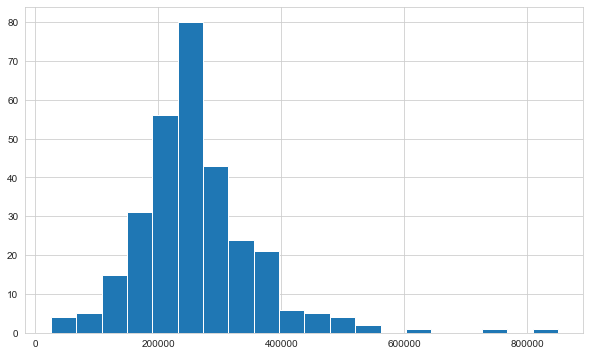

In [23]:
df['platelets'].hist(bins=20,figsize=(10,6))
display()

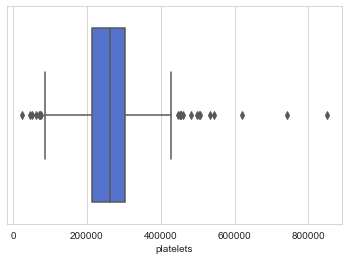

In [24]:
sns.boxplot(x = df['platelets'], color = 'royalblue')
display()

In [25]:
# La distribución de esta variable es normal. Posee algunos valores considerados como outliers.
# No identificamos data quality issues.

## Serum Creatinine

Esta variable refiere a la "Creatinina serica", esto es un producto de desecho generado por los músculos como parte de la actividad diaria. Normalmente, los riñones filtran la creatinina de la sangre y la expulsan del cuerpo por la orina. Cuando hay un problema con los riñones, la creatinina se puede acumular en la sangre y sale menos por la orina.
Este es un indicador muy interesante ya que nos ayuda a determinar que tan bien se encuentra funcionando los riñones de las personas ya que en base a la cantidad de creatinina serica que haya en la sangre podremos saber que tan bien se encuentran trabajando los riñones.
Los rangos normales de creatinina serica se encuentran entre 0.7 y 1.3 mg/dL para los hombres y entre 0.6 y 1.1 mg/dL para las mujeres. Las mujeres normalmente tienen niveles de creatinina serica mas bajos que los hombres ya que en general es porque las mujeres tienen menor masa muscular que los hombres. Es importante este punto y también es importante considerar que este nivel tambien varía acorde al tamaño y masa muscular de una persona. Seguramente en su nuestra muestra se encontrará a una persona como Hafthor Bjornsson el cual mide 2 metros y pesa 146 kg tendriamos un claro outlier en el caso de que sus riñones se encuentren funcionando normal.

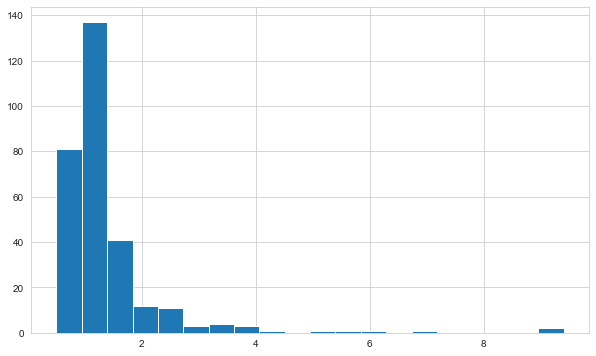

In [26]:
df['serum_creatinine'].hist(bins=20,figsize=(10,6))
display()

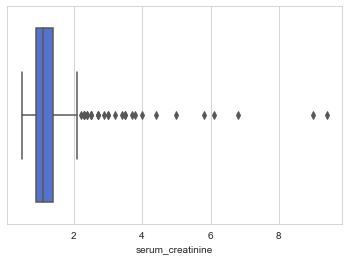

In [27]:
sns.boxplot(x = df['serum_creatinine'], color = 'royalblue')
display()

In [28]:
# La creatinina sérica presenta una distribución normal con un leve sesgo positivo, con algunos valores atípicos.
# No identificamos data quality issues.

## Serum Sodium

El "sodio serico" es basicamente la cantidad de sodio que contiene nuestra sangre. Esta es otra medida muy importante ya que ya sean altos o bajos niveles de sodio en sangre pueden llevar a serios problemas para el organismo, principalmente al sistema cardiaco. Un nivel normal de sodio en sangre se encuentra entre 135 y 145 miliequivalentes por litro (mEq/L). La hiponatremia por ejemplo, se produce cuando el sodio en el cuerpo se encuentra por debajo de 135 mEq/L.

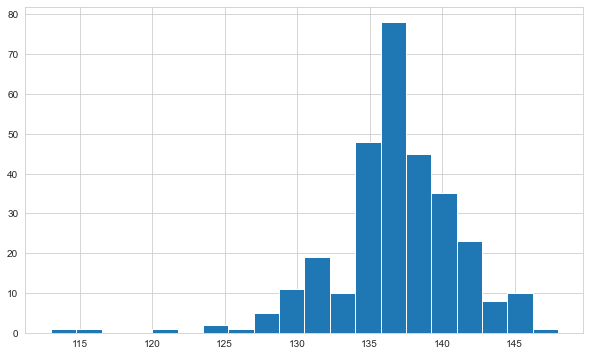

In [29]:
df['serum_sodium'].hist(bins=20,figsize=(10,6))
display()

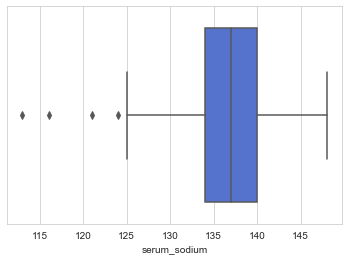

In [30]:
sns.boxplot(x = df['serum_sodium'], color = 'royalblue')
display()

In [31]:
# El sodio sérico presenta una distribución normal con un leve sesgo negativo, con algunos valores atípicos.
# No identificamos data quality issues.

## Sex

Género de los pacientes del estudio

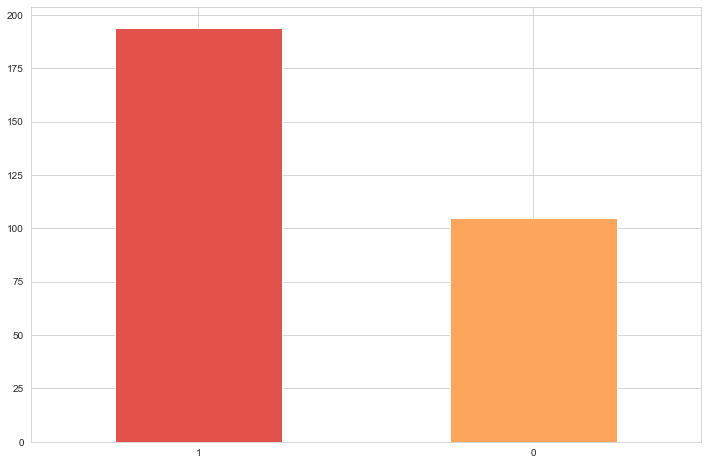

In [32]:
palette = sns.color_palette("Spectral")

df['sex'].value_counts().plot(kind='bar',figsize=(12,8),color = palette)
plt.xticks(rotation=0)
display()

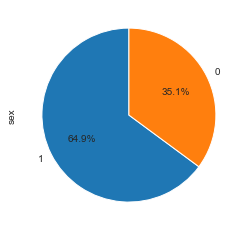

In [33]:
df['sex'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')
display()

In [34]:
# Masculino = 1
# Femenino = 0
# La mayoría de los pacientes no son hombres, con una diferencia de casi un 30%, alrededor de 100 pacientes.
# No identificamos data quality issues.

## Smoking

Todos los pacientes que son fumadores frecuentes.

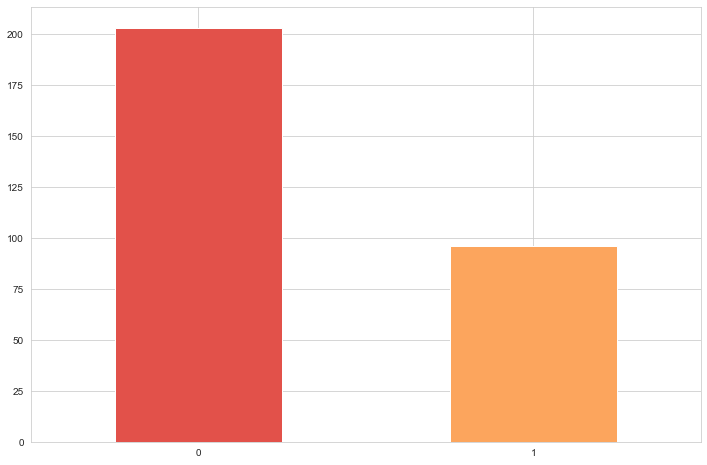

In [35]:
palette = sns.color_palette("Spectral")

df['smoking'].value_counts().plot(kind='bar',figsize=(12,8),color = palette)
plt.xticks(rotation=0)
display()

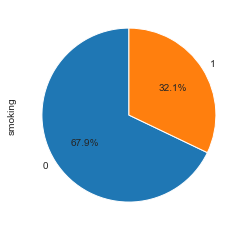

In [36]:
df['smoking'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')
display()

In [37]:
# Fumador frecuente = 1
# No fumador = 0
# La mayoría de los pacientes no son fumadores, con una diferencia de más de un 30%, alrededor de 100 pacientes.
# No identificamos data quality issues.

## Time

Cantidad de días de seguimiento médico de cada paciente

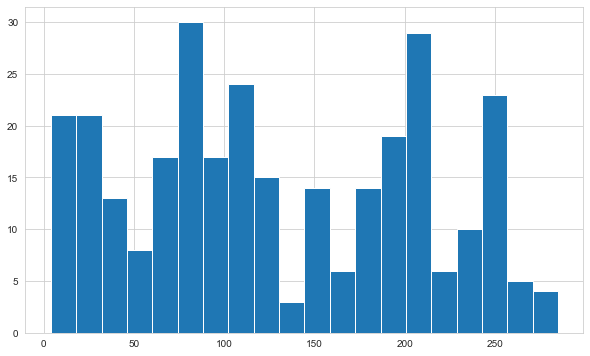

In [38]:
df['time'].hist(bins=20,figsize=(10,6))
display()

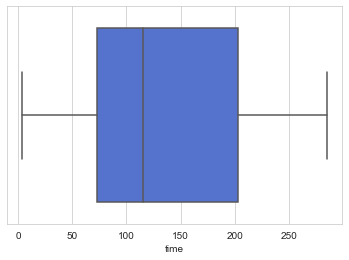

In [39]:
sns.boxplot(x = df['time'], color = 'royalblue')
display()

In [40]:
# La distribución para esta variable es multimodal. 
# No identificamos data quality issues.

## Death Event

Esta variable nos indica si el paciente falleció o no.

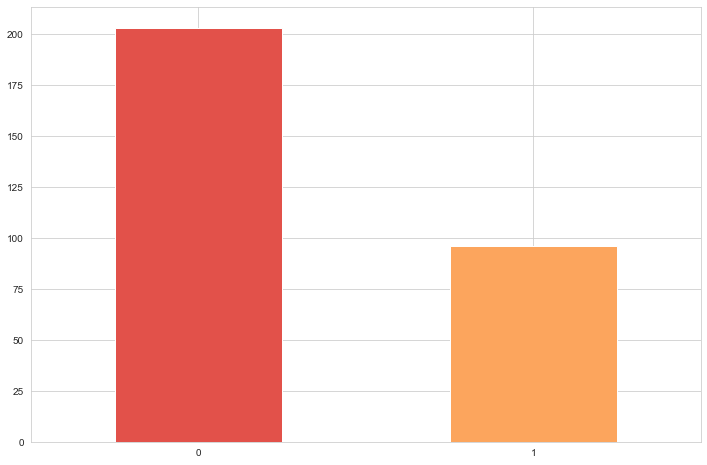

In [41]:
palette = sns.color_palette("Spectral")

df['DEATH_EVENT'].value_counts().plot(kind='bar',figsize=(12,8),color = palette)
plt.xticks(rotation=0)
display()

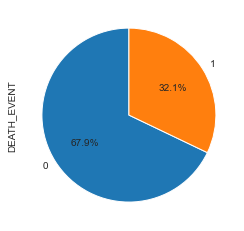

In [42]:
df['DEATH_EVENT'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')
display()

In [43]:
# Fallecido = 1
# No fallecido = 0
# La mayoría de los pacientes siguen vivos, con una diferencia de más de un 30%, alrededor de 100 personas.
# No identificamos data quality issues.

## Correlaciones entre Variables

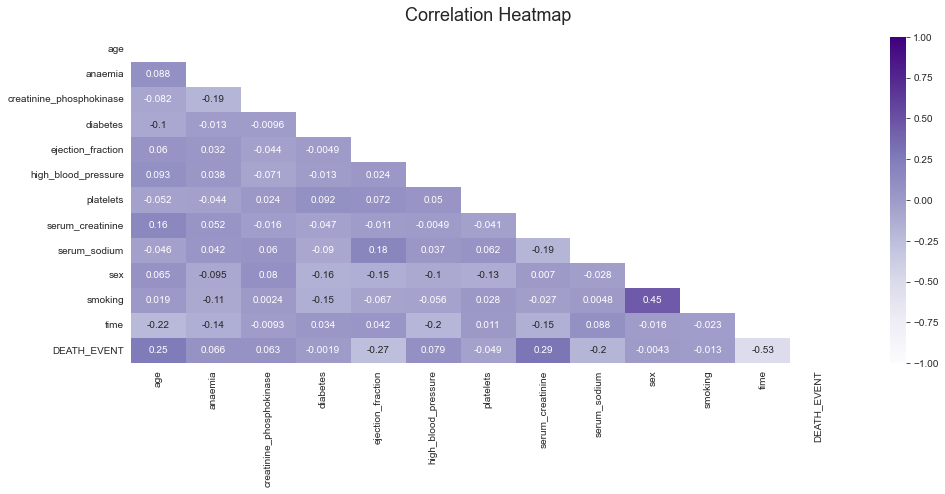

In [44]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Purples')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
display()

En la matriz de correlacion podemos hacer un analisis mas especifico y exhaustivo sobre nuestro DataFrame. 

**Correlación Positiva con Death Event:**
- Age - (0.25)
- Serum Cratinine - (0.29)

Estas dos variables posiblemente sean importantes respecto a si el paciente está dentro del grupo de riesgo de sufrir un ataque cardiovascular. Pero esto lo vamos a corroborar extensivamente en el siguiente punto, pero esto no quita que puedan llegar a ser un grandes indicadores a futuro.

**Correlación Negativa con Death Event:**
- Ejection Fraction - (-0.27)
- Serum Sodium - (-0.2)
- Time - (-0.53)

Estas tres variables posiblemente sean importantes respecto a si el paciente está dentro del grupo de riesgo de sufrir un ataque cardiovascular. Esta hipótesis será corroborada extensivamente en el siguiente punto, pero esto no quita que pueda llegar a ser cierta e influir en los pacientes.

# <font color='firebrick'> Parte 2:  <a id='remove'></a>
En esta etapa vamos a detectar las características de las poblaciones con mayor riesgo de muerte producto de un accidente cardiovascular.

Para encontrar las posibles variables que sirvan como indicadores de riesgo, vamos a llevar a cabo dos procesos. El primero será dividir el dataset de acuerdo al valor de la variable Death Event, con el objetivo de poder analzar cuáles variables tienen más presencia en aquellas personas fallecidas. Lo haremos utilizando gráficas y distintas métricas. El segundo será realizar un árbol de decisión para así poder ver cuáles variables influyeron más según los criterios del árbol, para decidir si la persona analizada se trata de una fallecida o viva.

In [45]:
no = df[df['DEATH_EVENT']==0]
si = df[df['DEATH_EVENT']==1]

## Age

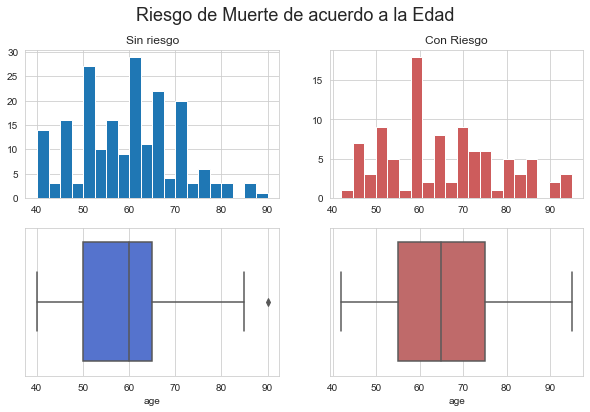

In [46]:
plt.figure(figsize=(16,10))
plt.suptitle("Riesgo de Muerte de acuerdo a la Edad", size = 18)
ax1 = plt.subplot(2,2,1)
plt.title("Sin riesgo")
no['age'].hist(bins=20,figsize=(10,6))

plt.subplot(2,2,2)
plt.title("Con Riesgo")
si['age'].hist(bins=20,figsize=(10,6),color = 'indianred')

plt.subplot(2,2,3)
sns.boxplot(x = no['age'], color = 'royalblue')

plt.subplot(2,2,4)
sns.boxplot(x = si['age'], color = 'indianred')

display()

In [47]:
print('El promedio de Edad de los pacientes con riesgo de ataque cardiovascular es:' ,si['age'].mean())
print('El promedio de Edad de los pacientes sin riesgo de ataque cardiovascular es:' ,no['age'].mean())

El promedio de Edad de los pacientes con riesgo de ataque cardiovascular es: 65.21528125
El promedio de Edad de los pacientes sin riesgo de ataque cardiovascular es: 58.76190640394089


## Anaemia

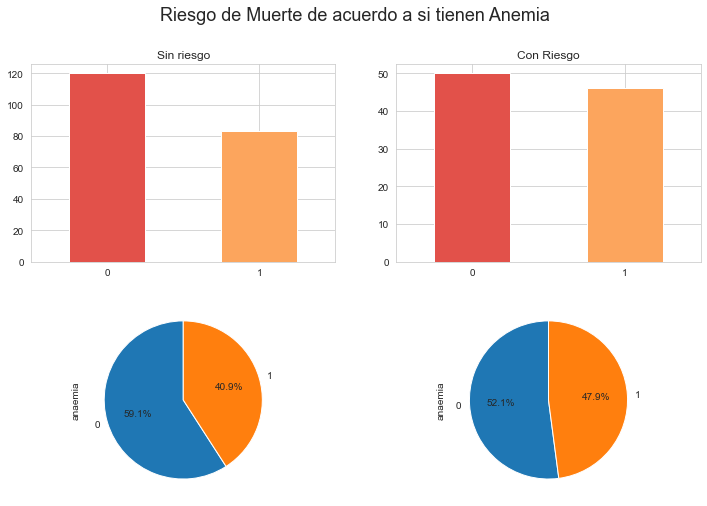

In [48]:
plt.figure(figsize=(16,10))
plt.suptitle("Riesgo de Muerte de acuerdo a si tienen Anemia", size = 18)
plt.subplot(2,2,1)
plt.title("Sin riesgo")
no['anaemia'].value_counts().plot(kind='bar',figsize=(12,8),color = palette)
plt.xticks(rotation=0)

plt.subplot(2,2,2)
plt.title("Con Riesgo")
si['anaemia'].value_counts().plot(kind='bar',figsize=(12,8),color = palette)
plt.xticks(rotation=0)

plt.subplot(2,2,3)
no['anaemia'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')

plt.subplot(2,2,4)
si['anaemia'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')

display()

In [49]:
print('La probabilidad de sufrir Anemia en los pacientes con riesgo de ataque cardiovascular es:' ,si['anaemia'].mean())
print('La probabilidad de sufrir Anemia en los pacientes sin riesgo de ataque cardiovascular es:' ,no['anaemia'].mean())

La probabilidad de sufrir Anemia en los pacientes con riesgo de ataque cardiovascular es: 0.4791666666666667
La probabilidad de sufrir Anemia en los pacientes sin riesgo de ataque cardiovascular es: 0.4088669950738916


## Creatinine Phosphokinase

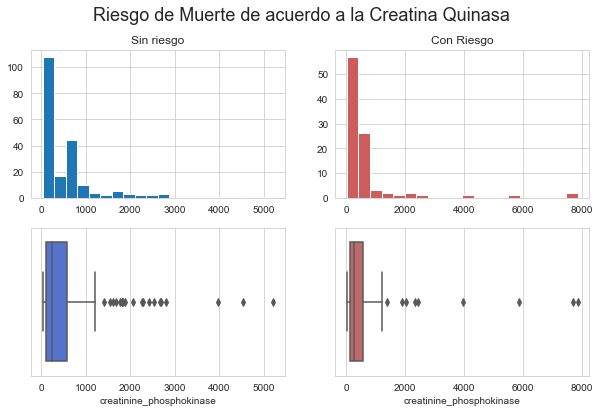

In [50]:
plt.figure(figsize=(16,10))
plt.suptitle("Riesgo de Muerte de acuerdo a la Creatina Quinasa", size = 18)
ax1 = plt.subplot(2,2,1)
plt.title("Sin riesgo")
no['creatinine_phosphokinase'].hist(bins=20,figsize=(10,6))

plt.subplot(2,2,2)
plt.title("Con Riesgo")
si['creatinine_phosphokinase'].hist(bins=20,figsize=(10,6),color = 'indianred')

plt.subplot(2,2,3)
sns.boxplot(x = no['creatinine_phosphokinase'], color = 'royalblue')

plt.subplot(2,2,4)
sns.boxplot(x = si['creatinine_phosphokinase'], color = 'indianred')
display()

In [51]:
print('El promedio de Creatina Quinasa de los pacientes con riesgo de ataque cardiovascular es:' ,si['creatinine_phosphokinase'].mean())
print('El promedio de Creatina Quinasa de los pacientes sin riesgo de ataque cardiovascular es:' ,no['creatinine_phosphokinase'].mean())

El promedio de Creatina Quinasa de los pacientes con riesgo de ataque cardiovascular es: 670.1979166666666
El promedio de Creatina Quinasa de los pacientes sin riesgo de ataque cardiovascular es: 540.0541871921182


## Ejection Fraction

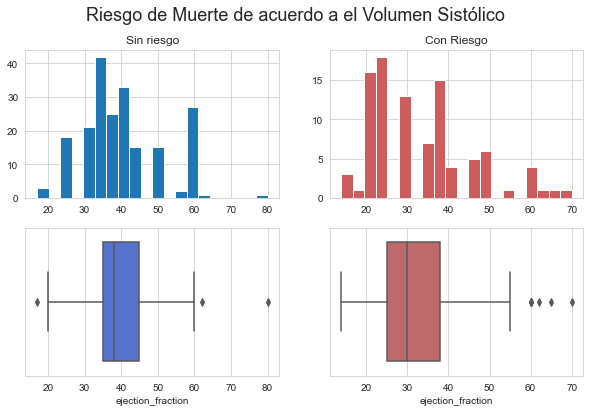

In [52]:
plt.figure(figsize=(16,10))
plt.suptitle("Riesgo de Muerte de acuerdo a el Volumen Sistólico", size = 18)
ax1 = plt.subplot(2,2,1)
plt.title("Sin riesgo")
no['ejection_fraction'].hist(bins=20,figsize=(10,6))

plt.subplot(2,2,2)
plt.title("Con Riesgo")
si['ejection_fraction'].hist(bins=20,figsize=(10,6),color = 'indianred')

plt.subplot(2,2,3)
sns.boxplot(x = no['ejection_fraction'], color = 'royalblue')

plt.subplot(2,2,4)
sns.boxplot(x = si['ejection_fraction'], color = 'indianred')
display()

In [53]:
print('El promedio de Volumen Sistólico de los pacientes con riesgo de ataque cardiovascular es:' ,si['ejection_fraction'].mean())
print('El promedio de Volumen Sistólico de los pacientes sin riesgo de ataque cardiovascular es:' ,no['ejection_fraction'].mean())

El promedio de Volumen Sistólico de los pacientes con riesgo de ataque cardiovascular es: 33.46875
El promedio de Volumen Sistólico de los pacientes sin riesgo de ataque cardiovascular es: 40.26600985221675


## High Blood Pressure

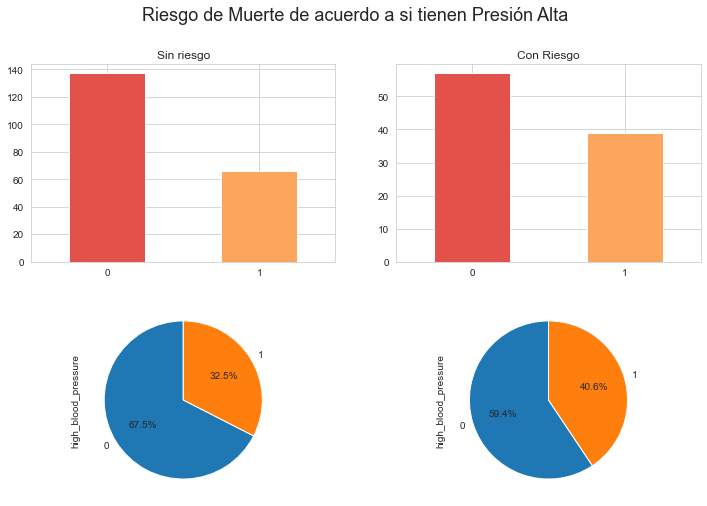

In [54]:
plt.figure(figsize=(16,10))
plt.suptitle("Riesgo de Muerte de acuerdo a si tienen Presión Alta", size = 18)
plt.subplot(2,2,1)
plt.title("Sin riesgo")
no['high_blood_pressure'].value_counts().plot(kind='bar',figsize=(12,8),color = palette)
plt.xticks(rotation=0)

plt.subplot(2,2,2)
plt.title("Con Riesgo")
si['high_blood_pressure'].value_counts().plot(kind='bar',figsize=(12,8),color = palette)
plt.xticks(rotation=0)

plt.subplot(2,2,3)
no['high_blood_pressure'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')

plt.subplot(2,2,4)
si['high_blood_pressure'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')

display()

In [55]:
print('La probabilidad de sufrir Presión Alta en los pacientes con riesgo de ataque cardiovascular es:' ,si['high_blood_pressure'].mean())
print('La probabilidad de sufrir Presión Alta en los pacientes sin riesgo de ataque cardiovascular es:' ,no['high_blood_pressure'].mean())

La probabilidad de sufrir Presión Alta en los pacientes con riesgo de ataque cardiovascular es: 0.40625
La probabilidad de sufrir Presión Alta en los pacientes sin riesgo de ataque cardiovascular es: 0.3251231527093596


## Platelets

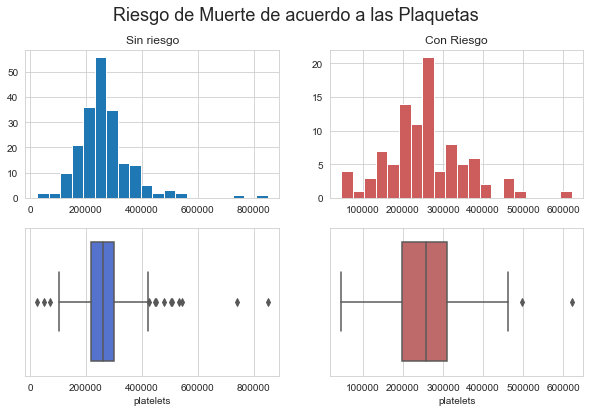

In [56]:
plt.figure(figsize=(16,10))
plt.suptitle("Riesgo de Muerte de acuerdo a las Plaquetas", size = 18)
ax1 = plt.subplot(2,2,1)
plt.title("Sin riesgo")
no['platelets'].hist(bins=20,figsize=(10,6))

plt.subplot(2,2,2)
plt.title("Con Riesgo")
si['platelets'].hist(bins=20,figsize=(10,6),color = 'indianred')

plt.subplot(2,2,3)
sns.boxplot(x = no['platelets'], color = 'royalblue')

plt.subplot(2,2,4)
sns.boxplot(x = si['platelets'], color = 'indianred')
display()

In [57]:
print('El promedio de Plaquetas de los pacientes con riesgo de ataque cardiovascular es:' ,si['platelets'].mean())
print('El promedio de Plaquetas de los pacientes sin riesgo de ataque cardiovascular es:' ,no['platelets'].mean())

El promedio de Plaquetas de los pacientes con riesgo de ataque cardiovascular es: 256381.0447916667
El promedio de Plaquetas de los pacientes sin riesgo de ataque cardiovascular es: 266657.4899014779


## Serum Creatinine

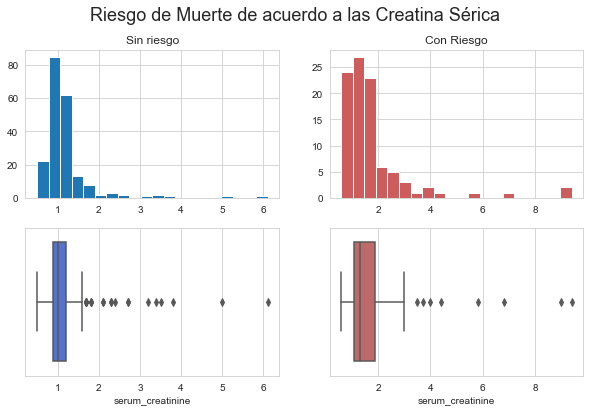

In [58]:
plt.figure(figsize=(16,10))
plt.suptitle("Riesgo de Muerte de acuerdo a las Creatina Sérica", size = 18)
ax1 = plt.subplot(2,2,1)
plt.title("Sin riesgo")
no['serum_creatinine'].hist(bins=20,figsize=(10,6))

plt.subplot(2,2,2)
plt.title("Con Riesgo")
si['serum_creatinine'].hist(bins=20,figsize=(10,6),color = 'indianred')

plt.subplot(2,2,3)
sns.boxplot(x = no['serum_creatinine'], color = 'royalblue')

plt.subplot(2,2,4)
sns.boxplot(x = si['serum_creatinine'], color = 'indianred')
display()

In [59]:
print('El promedio de Creatina Sérica de los pacientes con riesgo de ataque cardiovascular es:' ,si['serum_creatinine'].mean())
print('El promedio de Creatina Sérica de los pacientes sin riesgo de ataque cardiovascular es:' ,no['serum_creatinine'].mean())

El promedio de Creatina Sérica de los pacientes con riesgo de ataque cardiovascular es: 1.8358333333333332
El promedio de Creatina Sérica de los pacientes sin riesgo de ataque cardiovascular es: 1.184876847290641


## Serum Sodium

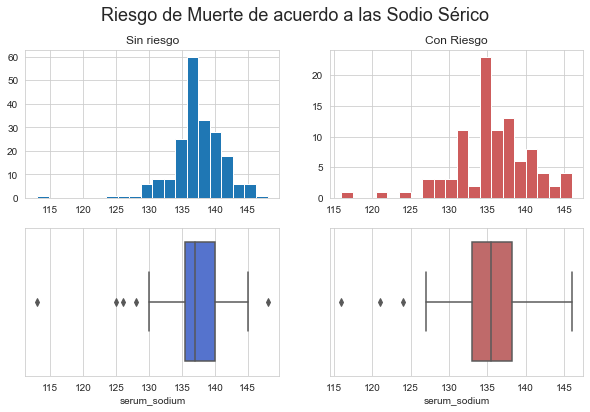

In [60]:
plt.figure(figsize=(16,10))
plt.suptitle("Riesgo de Muerte de acuerdo a las Sodio Sérico", size = 18)
ax1 = plt.subplot(2,2,1)
plt.title("Sin riesgo")
no['serum_sodium'].hist(bins=20,figsize=(10,6))

plt.subplot(2,2,2)
plt.title("Con Riesgo")
si['serum_sodium'].hist(bins=20,figsize=(10,6),color = 'indianred')

plt.subplot(2,2,3)
sns.boxplot(x = no['serum_sodium'], color = 'royalblue')

plt.subplot(2,2,4)
sns.boxplot(x = si['serum_sodium'], color = 'indianred')
display()

In [61]:
print('El promedio de Sodio Sérico de los pacientes con riesgo de ataque cardiovascular es:' ,si['serum_sodium'].mean())
print('El promedio de Sodio Sérico de los pacientes sin riesgo de ataque cardiovascular es:' ,no['serum_sodium'].mean())

El promedio de Sodio Sérico de los pacientes con riesgo de ataque cardiovascular es: 135.375
El promedio de Sodio Sérico de los pacientes sin riesgo de ataque cardiovascular es: 137.2167487684729


## Sexo

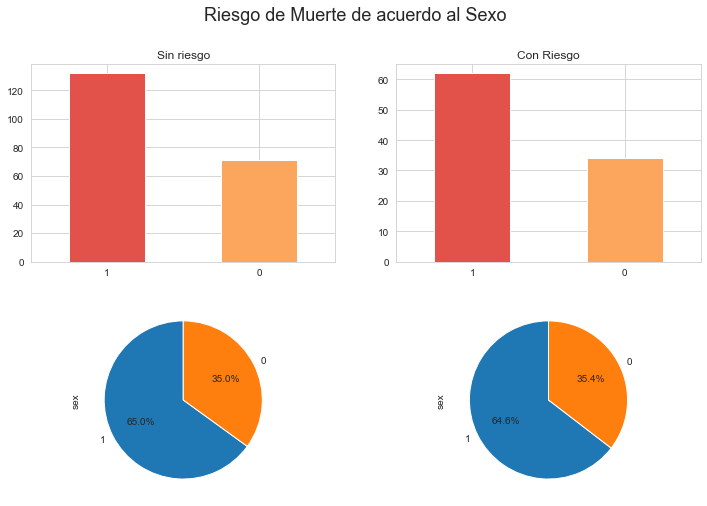

In [62]:
plt.figure(figsize=(16,10))
plt.suptitle("Riesgo de Muerte de acuerdo al Sexo", size = 18)
plt.subplot(2,2,1)
plt.title("Sin riesgo")
no['sex'].value_counts().plot(kind='bar',figsize=(12,8),color = palette)
plt.xticks(rotation=0)

plt.subplot(2,2,2)
plt.title("Con Riesgo")
si['sex'].value_counts().plot(kind='bar',figsize=(12,8),color = palette)
plt.xticks(rotation=0)

plt.subplot(2,2,3)
no['sex'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')

plt.subplot(2,2,4)
si['sex'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')

display()

## Smoking

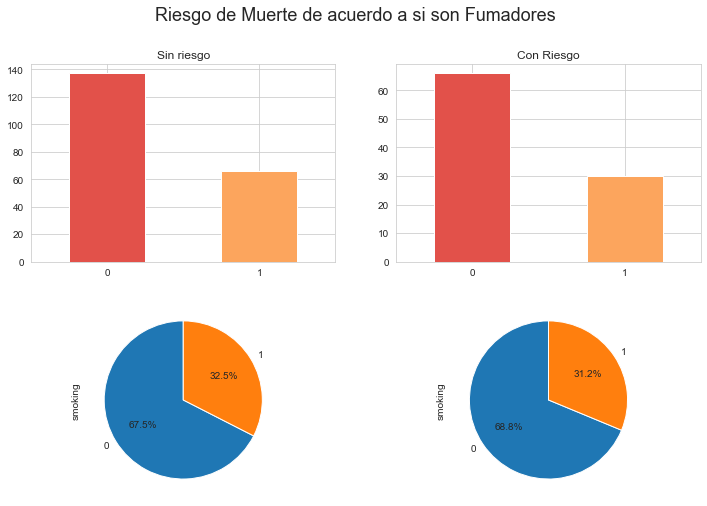

In [63]:
plt.figure(figsize=(16,10))
plt.suptitle("Riesgo de Muerte de acuerdo a si son Fumadores", size = 18)
plt.subplot(2,2,1)
plt.title("Sin riesgo")
no['smoking'].value_counts().plot(kind='bar',figsize=(12,8),color = palette)
plt.xticks(rotation=0)

plt.subplot(2,2,2)
plt.title("Con Riesgo")
si['smoking'].value_counts().plot(kind='bar',figsize=(12,8),color = palette)
plt.xticks(rotation=0)

plt.subplot(2,2,3)
no['smoking'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')

plt.subplot(2,2,4)
si['smoking'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')

display()

In [64]:
print('La probabilidad de ser Fumador en los pacientes con riesgo de ataque cardiovascular es:' ,si['smoking'].mean())
print('La probabilidad de ser Fumador en los pacientes sin riesgo de ataque cardiovascular es:' ,no['smoking'].mean())

La probabilidad de ser Fumador en los pacientes con riesgo de ataque cardiovascular es: 0.3125
La probabilidad de ser Fumador en los pacientes sin riesgo de ataque cardiovascular es: 0.3251231527093596


## Time

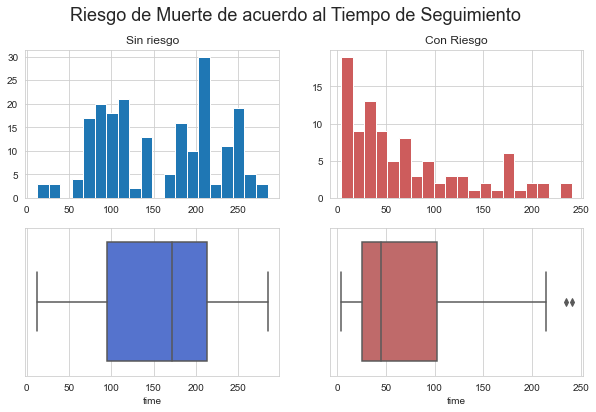

In [65]:
plt.figure(figsize=(16,10))
plt.suptitle("Riesgo de Muerte de acuerdo al Tiempo de Seguimiento", size = 18)
ax1 = plt.subplot(2,2,1)
plt.title("Sin riesgo")
no['time'].hist(bins=20,figsize=(10,6))

plt.subplot(2,2,2)
plt.title("Con Riesgo")
si['time'].hist(bins=20,figsize=(10,6),color = 'indianred')

plt.subplot(2,2,3)
sns.boxplot(x = no['time'], color = 'royalblue')

plt.subplot(2,2,4)
sns.boxplot(x = si['time'], color = 'indianred')
display()

In [66]:
print('El promedio de días de seguimiento de los pacientes con riesgo de ataque cardiovascular es:' ,si['time'].mean())
print('El promedio de días de seguimiento de los pacientes sin riesgo de ataque cardiovascular es:' ,no['time'].mean())

El promedio de días de seguimiento de los pacientes con riesgo de ataque cardiovascular es: 70.88541666666667
El promedio de días de seguimiento de los pacientes sin riesgo de ataque cardiovascular es: 158.3399014778325


## Árbol de Decisión

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [68]:
x = df.iloc[:, 0:12]
y = df.iloc[:, 12:13]

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 13)

In [70]:
arb = DecisionTreeClassifier(random_state=13, criterion='entropy',max_leaf_nodes=6)
arb = arb.fit(x_train, y_train)

In [71]:
tree_pred = arb.predict(x_test)

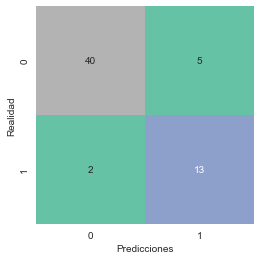

In [72]:
matriz = confusion_matrix(y_test, tree_pred)
sns.heatmap(matriz.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [73]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        42
           1       0.87      0.72      0.79        18

    accuracy                           0.88        60
   macro avg       0.88      0.84      0.85        60
weighted avg       0.88      0.88      0.88        60



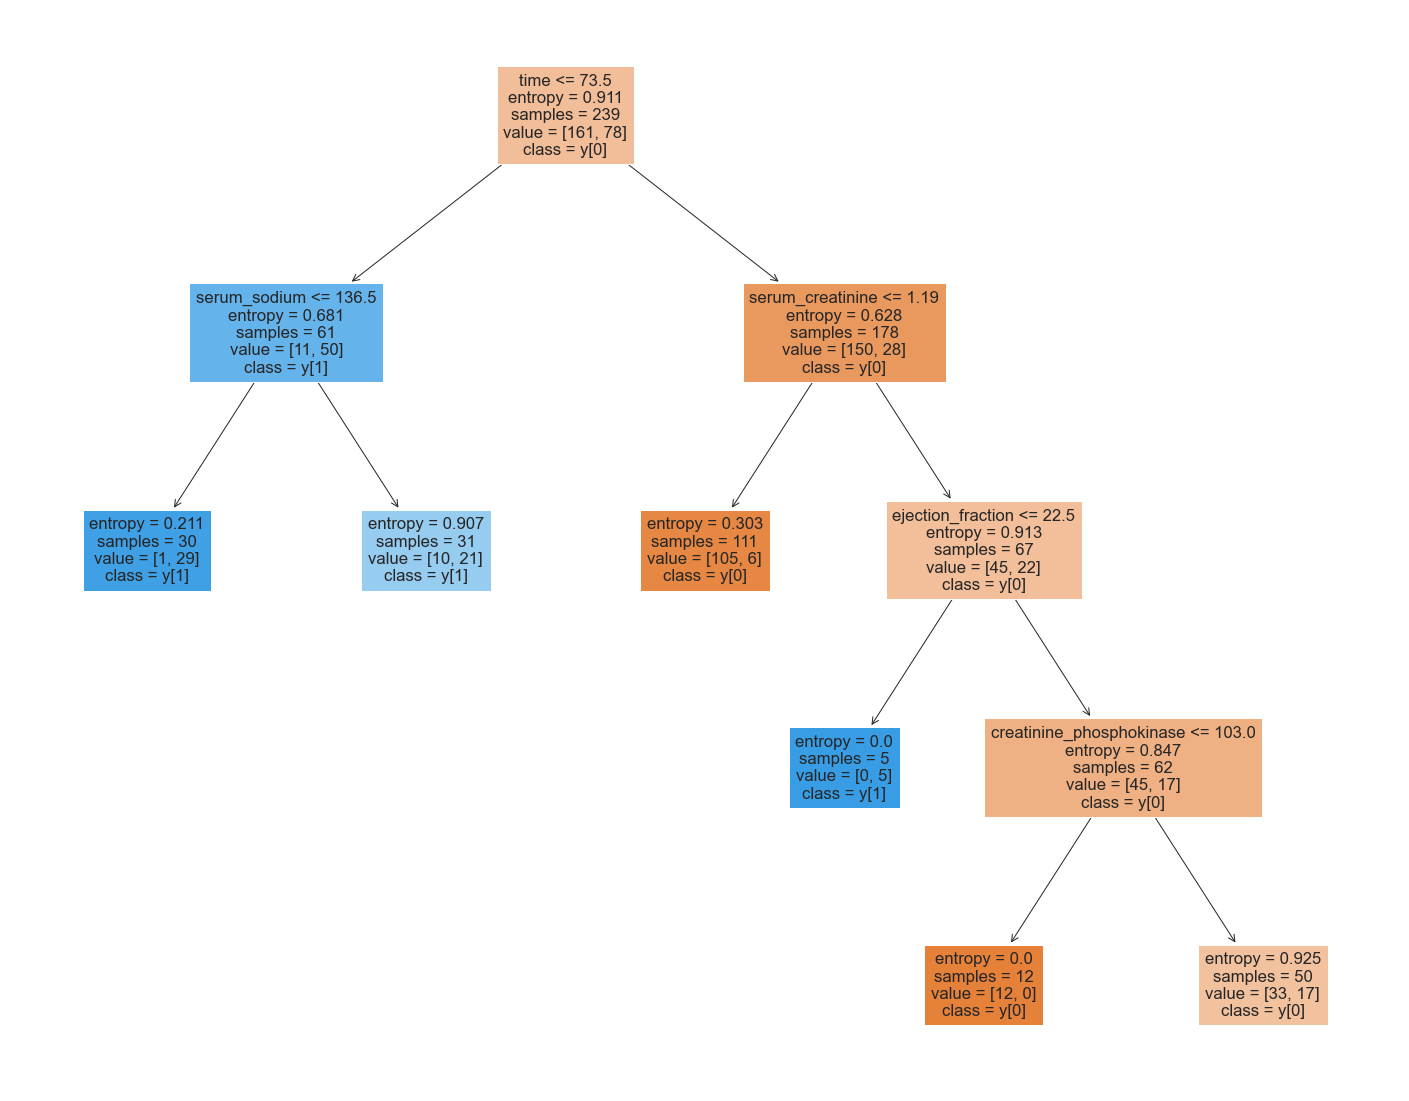

In [74]:
from sklearn import tree


fig = plt.figure(figsize = (25, 20))

tree.plot_tree(arb, feature_names = list(x.columns.values), class_names = True, filled = True)

plt.show()

## Conclusiones

Luego de haber realizado un extensivo análisis descriptivo de todas las variables del dataset y un modelo de predicción haciendo un modelo de árboles de decisión, hemos logrado detectar las características de las poblaciones con mayor riesgo de muerte producto de un accidente cardiovascular. Ambos estudios nos han arrojado resultados similares. El volumen sistólico (Ejection Fraction), la creatina quinasa (Creatine Phosphokinase), la edad de los pacientes y si sufren de anemia. Las primeras dos, confirman lo mencionado en el paper como variables que influyen en la salud cardiovascular de una persona. Tener un volumen de sangre bombeada por el ventriculo izquierdo en un latido fuera de los 70 ml por latido es síntoma de riesgo. Los pacientes que se detactaron con mayor riesgo, tienen ne promedio un volumen de sangre bombeada de alrededor de 34 ml lo cual es bastante malo. Viendo el árbol, podemos sacar que la variable de creatina quinasa es sumamente buena para dividir la población en si van a tener riesgo de sufrir problemas cardíacos o no. Además, a las variables de edad y de anemia las decidimos incluir dentro de este selecto grupo, ya que la diferencia de edad entre las personas que sufren riesgo de un ataque es de casi 7 años, una diferencia grande como para no ser considerada. También el porcentaje entre los que sufren de anemia en ambos grupos (los de riesgo y los que no) es mayor en el de riesgo con un 8% más.


Decidimos no realizar un modelo de aprendizaje no supervisado ya que no lo considerábamos útil para la disyuntiva que queremos analizar. El análisis mediante clusters, al estar manejando tan solo 300 datos no es efectivo. Los posibles clusters creados no nos brindan información ni tendencias sobre posibles distinciones físicas de los pacientes estudidados. Dicho esto, consideramos que las dos técnicas mencionadas y analizadas anteriormente nos proporcionaron resultados mejores de los que nos podría haber brindado la realización de un aprendizaje no supervisado. 

# <font color='firebrick'> Parte 3:  <a id='stemming'></a>
Para las poblaciones de mayor riesgo, en función de las respuestas obtenidas en el formulario de alta, vamos a determinar el conjunto de resultados clínicos que el potencial asegurado debe entregar para avanzar en el proceso de obtención de la póliza

De acuerdo a todo el proceso de análisis realizado en el punto anterior del trabajo, en donde detectamos las variables que más influencia tienen como principal factores de riesgo de sufrir un ataque cardiovascular, consideramos que un estudio que no puede faltar es un análisis de sangre. Este estudio va a permitir a los pacientes, medir los niveles de azúcar en sangre, todos los de creatinina trabajados, sus plaquetas, entre otros. Además será necesario requerir un electrocardiograma, que se usa para encontrar y vigilar varias enfermedades del corazón, por ejemplo: latidos cardíacos irregulares (arritmia), obstrucción de arterias. Una tomografía también sería útil para el paciente ya que con ella se pueden detectar problemas de la aorta, como también problemas con la función cardíaca y las válvulas.

# <font color='firebrick'> Parte 4:  <a id='stop'></a>
En la cuarta etapa del trabajo vamos a realizar un modelo predictivo que determine si el potencial asegurado requiere de la realización de análisis clínicos adicionales o la póliza le será entregada sin averiguaciones adicionales.

In [75]:
sint = pd.read_csv('Datos Sintéticos - Hoja 1.csv')
sint.head()

,Nombre y apellido,Edad,Altura,Peso,Hace Deporte,Fumador Frecuente,Realiza Actividades de Riesgo,Sufre de Insuficiencia Cardíaca,Sufre de Hipertensión,Sufre Fatiga Muscular,Tiene Dificultades para Respirar,Dolor de Pecho,Hinchazón de Piernas y Brazos,Análisis Extra
0,Robert Pattinson,74,150,69,1,1,1,0,0,1,0,0,0,0
1,Bill Hader,70,172,76,0,1,0,1,1,1,1,1,1,1
2,Jerry Seinfeld,72,173,78,0,1,0,1,1,1,1,1,1,1
3,George Costanza,61,174,59,1,1,0,0,0,0,0,0,1,0
4,Quail Rodriguez,59,186,67,0,0,0,0,1,0,1,1,0,1


In [76]:
x = sint.iloc[:, 1:13]
y = sint.iloc[:, 13:14]

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.80, random_state = 3)

In [78]:
from sklearn.ensemble import RandomForestClassifier

modelo11 = RandomForestClassifier(n_estimators=200)
modelo11.fit(x_train, y_train)
modelo11_pred = modelo11.predict(x_test)

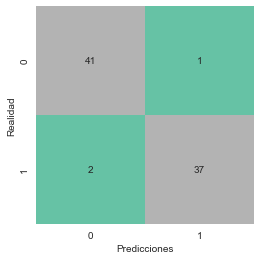

In [79]:
matriz11 = confusion_matrix(y_test, modelo11_pred)
sns.heatmap(matriz11.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [80]:
print(classification_report(y_test, modelo11_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.95      0.97      0.96        38

    accuracy                           0.96        81
   macro avg       0.96      0.96      0.96        81
weighted avg       0.96      0.96      0.96        81



Para esta etapa logramos armar un modelo predictivo en base a los datos solicitados a la persona, con el objetivo de facilitar los procesos de aceptación o negación de la poliza. Además agregamos algunas preguntas extra al cuestionario, para que de cierta manera faciliten la decisión del modelo. La parte más desafiante a la hora de crear datos sintéticos fue la de lograr que los datos mantengan algún tipo de relación lógica, para que el modelo pueda predecir con la mayor exactitud posible. Cabe aclarar que los resultados del modelo realizado son más de lo que esperábamos, pero esto es fruto de la manera en la que armamos el dataset, ya que creamos algunas variables cuyo resultado es casi 100% dependiente de otra. Si estuviéramos manejando datos que se adecúen a la realidad, todo este proceso sería exitoso. A pesar de basarse en datos sintéticos, creemos que lo creado por nosotros puede servir como base hacia algo mejor a desarrollarse en el futuro.

# <font color='firebrick'> Parte 5:  <a id='a'></a>

En esta parte vamos a realizar un modelo predictivo el cual pueda determinar en base a los datos clinicos de los clientes si este verdaderamente tiene riesgo de morir o no. Para comenzar esto podemos empezar por Normalizar nuestros datos ya que los rangos de los datos son muy diferentes entre sí lo cual puede distorsionar nuestros resultados.

En este caso vamos a utilizar StandardScaler para Normalizar/Estantarizar nuestros datos.

In [81]:
df_norm = df.iloc[:,[0,2, 4, 6, 7, 8, 11]]
df_norm

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270
295,55.0,1820,38,270000.00,1.2,139,271
296,45.0,2060,60,742000.00,0.8,138,278
297,45.0,2413,38,140000.00,1.4,140,280


In [82]:
from sklearn.preprocessing import StandardScaler

df_norm = pd.DataFrame(StandardScaler().fit_transform(df_norm), columns = df_norm.columns)

In [83]:
df_norm.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


In [84]:
df_bin = df.iloc[:,[1, 3, 5, 9, 10, 12]]

In [85]:
df_merge = pd.concat([df_norm, df_bin], axis=1,)

In [86]:
df_merge.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0,1
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1,0,1
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0,1
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0,1


Normalizamos nuestros datos pero como se puede ver no lo hicimos con todos ya que los binarios los dejamos como estaban debido a que sino perderian su registro, su importancia. Ya que significan si tienen o no tienen cierta caracteristica, si los normalizaramos pasarian a tener un valor entre 0 y 1 por lo que no podriamos distinguir cuales eran 1 y cuales 0 y por lo tanto perderiamos esos datos. Si bien el dataset no queda del TODO normalizado al menos es mejor de como estaba antes y ademas los binarios toman el valor de 1 y 0, por lo que tampoco es un rango tan grande o diferente a los rangos de los datos normalizados.

Ahora que ya hicimos esta parte, vamos a pasar a entrenar diferentes modelos, testearlos y evaluarlos con algunas metricas para determinar cual modelo es el mas conveniente. Vamos a probar con Modelos de Regresion Lineal, Regresion Logistica, Naive Bayes, Decision Trees, Random Forest, KNN.

## Regresión Lineal

In [87]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [88]:
xreg= df_merge.drop('DEATH_EVENT', axis = 1)
yreg= df_merge['DEATH_EVENT']

In [89]:
x_train, x_test, y_train, y_test = train_test_split(xreg, yreg, test_size =0.20, random_state = 3)

In [90]:
modelo1 = LinearRegression().fit(x_train,y_train)

y_pred = modelo1.predict(x_test)

In [91]:
mean_absolute_error(y_test,y_pred)

0.3243530064344816

In [92]:
math.sqrt(mean_squared_error(y_test,y_pred))

0.3886552814734627

## Regresión Logística

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [94]:
x = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 2)

In [96]:
modelo2 = LogisticRegression()
modelo2.fit(x_train, y_train)
modelo2_pred = modelo2.predict(x_test)

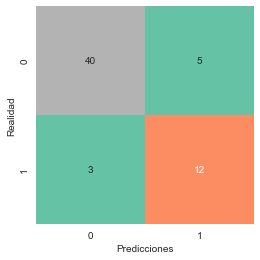

In [97]:
matriz2 = confusion_matrix(y_test, modelo2_pred)
sns.heatmap(matriz2.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [98]:
print(classification_report(y_test, modelo2_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.80      0.71      0.75        17

    accuracy                           0.87        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.86      0.87      0.86        60



In [99]:
modelo2_pred_proba = modelo2.predict_proba(x_test)
x_test['probability'] = modelo2_pred_proba.T[1]

In [100]:
print(roc_auc_score(y_test, modelo2_pred))

0.8180574555403557


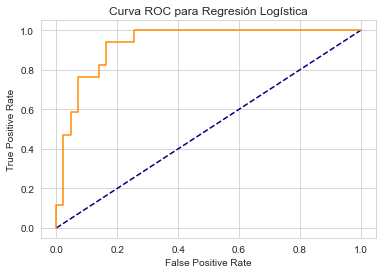

In [101]:
false_prate, true_prate, thresholds = roc_curve(y_test, modelo2_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Regresión Logística')
display()

## Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.20, random_state = 5)

In [104]:
modelo3 = GaussianNB()
modelo3.fit(x_train, y_train)
modelo3_pred = modelo3.predict(x_test)

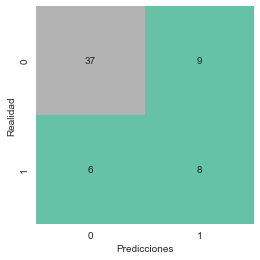

In [105]:
matriz3 = confusion_matrix(y_test, modelo3_pred)
sns.heatmap(matriz3.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [106]:
print(classification_report(y_test, modelo3_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        43
           1       0.57      0.47      0.52        17

    accuracy                           0.75        60
   macro avg       0.69      0.67      0.67        60
weighted avg       0.74      0.75      0.74        60



In [107]:
modelo3_pred_proba = modelo3.predict_proba(x_test)
x_test['probability'] = modelo3_pred_proba.T[1]

In [108]:
print(roc_auc_score(y_test, modelo3_pred))

0.6655266757865937


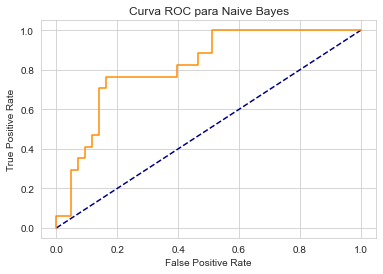

In [109]:
false_prate, true_prate, thresholds = roc_curve(y_test, modelo3_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Naive Bayes')
display()

## Decision Trees

In [110]:
x = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

In [111]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

In [112]:
from sklearn.tree import DecisionTreeClassifier

# En este caso dejamos los parentesis vacíos, pero podemos probar variando "max_depth" lo cual se encarga de regular la
# profundidad del árbol.
modelo4 = DecisionTreeClassifier()

# Entranamos nuestro modelo
modelo4 = modelo4.fit(x_train, y_train)

In [113]:
modelo4_pred = modelo4.predict(x_test)

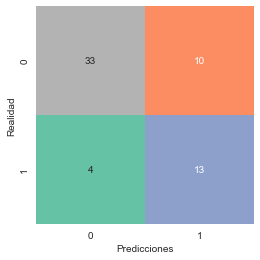

In [114]:
matriz4 = confusion_matrix(y_test, modelo4_pred)
sns.heatmap(matriz4.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [115]:
print(classification_report(y_test, modelo4_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82        37
           1       0.76      0.57      0.65        23

    accuracy                           0.77        60
   macro avg       0.77      0.73      0.74        60
weighted avg       0.77      0.77      0.76        60



In [116]:
modelo4_pred_proba = modelo4.predict_proba(x_test)
x_test['probability'] = modelo4_pred_proba.T[1]

In [117]:
print(roc_auc_score(y_test, modelo4_pred))

0.7285546415981198


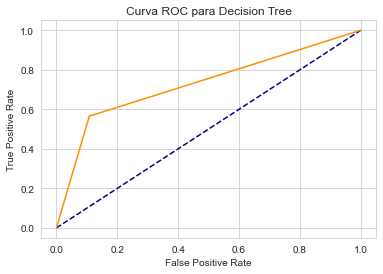

In [118]:
false_prate, true_prate, thresholds = roc_curve(y_test, modelo4_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Decision Tree')
display()

## Random Forest

In [119]:
x = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.80, random_state = 3)

In [121]:
from sklearn.ensemble import RandomForestClassifier

modelo5 = RandomForestClassifier(n_estimators=200)
modelo5.fit(x_train, y_train)
modelo5_pred = modelo5.predict(x_test)

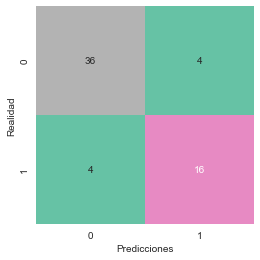

In [122]:
matriz5 = confusion_matrix(y_test, modelo5_pred)
sns.heatmap(matriz5.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [123]:
print(classification_report(y_test, modelo5_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        40
           1       0.80      0.80      0.80        20

    accuracy                           0.87        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.87      0.87      0.87        60



In [124]:
modelo5_pred_proba = modelo5.predict_proba(x_test)

In [125]:
print(roc_auc_score(y_test, modelo5_pred))

0.8500000000000001


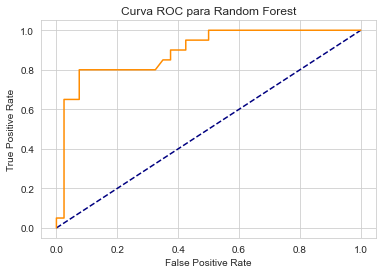

In [126]:
false_prate, true_prate, thresholds = roc_curve(y_test, modelo5_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Random Forest')
display()

## KNN

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
xknn= df.drop('DEATH_EVENT', axis = 1)
yknn= df['DEATH_EVENT']

x_train, x_test, y_train, y_test = train_test_split(xknn, yknn, test_size =0.20, random_state = 5)

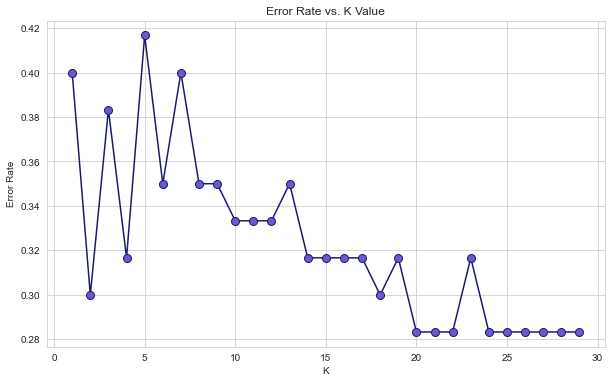

In [129]:
error_rate = []
for i in range(1, 30):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 30), error_rate, color ='midnightblue', marker ='o', markerfacecolor ='slateblue', markersize = 8)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
display()

In [130]:
modeloknn = KNeighborsClassifier(n_neighbors=3)
modeloknn.fit(x_train, y_train)
modeloknn_pred = modeloknn.predict(x_test)

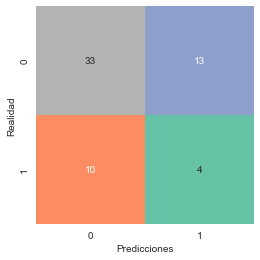

In [131]:
matrizknn = confusion_matrix(y_test, modeloknn_pred)
sns.heatmap(matrizknn.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [132]:
print(classification_report(y_test, modeloknn_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74        43
           1       0.29      0.24      0.26        17

    accuracy                           0.62        60
   macro avg       0.50      0.50      0.50        60
weighted avg       0.60      0.62      0.60        60



In [133]:
modeloknn_pred_proba = modeloknn.predict_proba(x_test)
x_test['probability'] = modeloknn_pred_proba.T[1]

In [134]:
print(roc_auc_score(y_test, modeloknn_pred))

0.5013679890560876


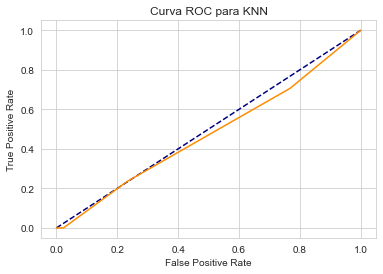

In [135]:
false_prate, true_prate, thresholds = roc_curve(y_test, modeloknn_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para KNN')
display()

# <font color='firebrick'> Comentarios Finales:  <a id='b'></a>

1- Primero podemos destacar que por medio de este tipo de trabajos de análisis de datos y predicciones se puede lograr capturar un mayor número de clientes de una manera segura. Al decir de una manera segura, nos referimos a seleccionar específicamente a aquellos clientes los cuáles al momento de darles la póliza no deberían de tener mayores complicaciones de salud durante un tiempo lo cual le asegura a la aseguradora que pueda generar ganancias y no perder dinero.

2- Nos gustaría destacar que trabajamos con pocos datos e inclusive con una base de datos sintéticos, es importante tener en cuenta que si nuestras pruebas con los modelos no fueron tan buenas se debe principalmente a eso, pero lo importante es que pudimos destacar y encontrar diferentes maneras y atributos para poder diferenciar a qué futuros clientes deberíamos darle la póliza y a cuáles no. Inclusive pudimos ir un poco más allá y encontrar la manera de decidir a que clientes no, y descartarlos instantáneamente sino que solicitarles más datos clínicos y en base a esos datos poder decidir si realmente darles o no la póliza. De esta manera se puede maximizar al máximo el número de clientes, por lo que muy seguramente también las ganancias.

3- Cabe destacar que hay varias características que es bueno tener en cuenta otras para determinar si verdaderamente están fuera de los parámetros normales de salud de una persona. Ya lo explicamos anteriormente pero hay algunas que dependen mucho del peso y tamaño de una persona, este tipo de datos que los podemos catalogar tal vez como outliers deberían de ser tratados en un futuro ya que algunas veces puede parecer que la persona no tenga una salud óptima según los parámetros normales pero si tal vez tuviéramos o cruzáramos mas datos podríamos llegar a que la persona no está tan mal como parece.

4- Con los modelos creados y los datos analizados pudimos construir las bases para poder crear algo muy bueno en un futuro utilizando más herramientas y más datos, principalmente datos reales y NO sintéticos para poder entrenar de mejor manera nuestros modelos y futuros modelos logrando alcanzar mejores resultados y crear diferentes tácticas para poder atraer más clientes.

5- Por último, nos gustaría hablar sobre nuestro desempeño en la tarea. Al principio nos sentíamos un tanto confundidos, con tantas preguntas e información disponible a la hora de comenzar. Con el paso del tiempo y el comienzo del trabajo en la notebook, nos fuimos encontrando con el trabajo, y fuimos entendiendo cada parte, logrando resultados satisfactorios en cada una de ellos. Creemos que si bien toda la tarea ha sido un desafío desde el principio, pudimos dar lo mejor de nosotros de acuerdo a todos los conocimientos que manejamos, y llegamos a todo este extenso trabajo del cual nos vamos contentos con lo que logramos.